# APP Store Games

The mobile games industry is worth billions of dollars, with companies spending vast amounts of money on the development and marketing of these games to an equally large market. Using this data set, insights can be gained into a sub-market of this market, strategy games. This sub-market includes titles such as  Leqague of Legends, Clash of Clans, Plants vs Zombies and Pokemon GO.



**Data sources:** https://www.kaggle.com/datasets/tristan581/17k-apple-app-store-strategy-games

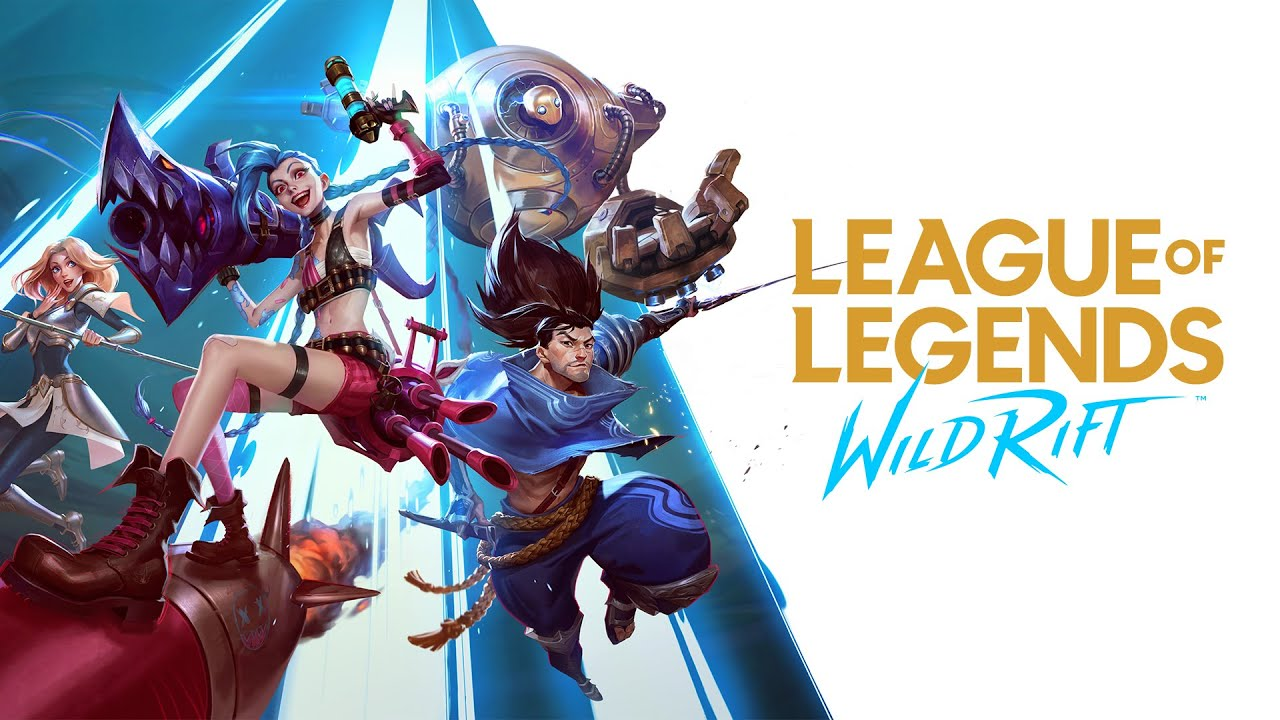

This is the data of 17007 strategy games on the Apple App Store. It was collected on the 3rd of August 2019, using the iTunes API and the App Store sitemap.

#  Case Study Objectives

The goal of this project is to analyze gaming trends from appstore, particularly in android mobiles phones and mac os.
This project will scope, analyze, prepare, plot data, and seek to explain the findings from the analysis.

Here are a few questions that this project has sought to answer:

- Top rating games?
- In demand game genre's?
- Cheapest and most expensive games?
- What is the relation of game rating to price?
- Is use rating count relevant to games popularity?



### Content
1. Import data and packages

2. Data Exploration
 - 2.1 Data Inspection
 - 2.2 achuchuchu blah blah blahh
 - 2.3 Handling Missing Values
 - 2.4 Wragling and Cleaning Data
 
  
3. Feature Engineering
 - 3.1 Encoding Categorical Variables
 - 3.2 Filter, Wrapper, Regularization and Hypetuning


4. Linear Regression
 - 4.1 Feature selection
 - 4.2 Simple Linear Regression
 - 4.3 Multiple Linear Regression
 - 4.4 Model Evaluation


5. Logistic Regression
 - 5.1 Cofussion matrix
 - 5.2 Accuracy, Precision, Recall, F1 score
 - 5.3 Model Evaluation


6. KNN
  - 6.1 KNN Classifier
  - 6.2 KNN Regressor
  
7. Decision Tree
  





`Data Dictionary:`

- `Name`: Game game
- `Average User Rating`: Rounded to nearest .5, requires at least 5 ratings
- `User Rating Count`: Number of ratings internationally, null means it is below 5
- `Price`: Price in USD
- `Developer`: Games developer
- `Age Rating`: Age that suitable for the game
- `Size`: Game app size in bytes
- `Primary Genre`: The main genre
- `Genres`: Game app genres
- `Original Release data`: When it was released
- `Current Version Release Date`: When it was last updated

`to do:`

regression
- predict price game rating
- linear reg
- knn reg
- decision tree (good game or bad game?)

classification
- create new column will be in top 10 or not?
- logistic
- knn
- decistion tree (game rating)

Advantage and disadvantege of each prediction?


# Import Packages and Load Data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import seaborn as sns
import numpy as np
from scipy.stats import pearsonr
pd.set_option('display.max_columns', None)

C:\Users\Toto\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
df= pd.read_csv('appstore_games.csv')

In [4]:
# Data Inspection
df.head(2)

,URL,ID,Name,Subtitle,Icon URL,Average User Rating,User Rating Count,Price,In-app Purchases,Description,Developer,Age Rating,Languages,Size,Primary Genre,Genres,Original Release Date,Current Version Release Date
0,https://apps.apple.com/us/app/sudoku/id284921427,284921427,Sudoku,NaN,https://is2-ssl.mzstatic.com/image/thumb/Purpl...,4.0,3553.0,2.99,NaN,"Join over 21,000,000 of our fans and download ...",Mighty Mighty Good Games,4+,"DA, NL, EN, FI, FR, DE, IT, JA, KO, NB, PL, PT...",15853568.0,Games,"Games, Strategy, Puzzle",11/07/2008,30/05/2017
1,https://apps.apple.com/us/app/reversi/id284926400,284926400,Reversi,NaN,https://is4-ssl.mzstatic.com/image/thumb/Purpl...,3.5,284.0,1.99,NaN,"The classic game of Reversi, also known as Oth...",Kiss The Machine,4+,EN,12328960.0,Games,"Games, Strategy, Board",11/07/2008,17/05/2018


In [8]:
df.Genres.nunique()

1004

In [6]:
df.columns

Index(['URL', 'ID', 'Name', 'Subtitle', 'Icon URL', 'Average User Rating',
       'User Rating Count', 'Price', 'In-app Purchases', 'Description',
       'Developer', 'Age Rating', 'Languages', 'Size', 'Primary Genre',
       'Genres', 'Original Release Date', 'Current Version Release Date'],
      dtype='object')

# 2. Data Exploration

`User Rating Count: Number of ratings internationally, null means it is below 5`

I will drop these Nan values in `Average User Rating` column since this games was below the required number of `User Rating Count` and it is not relevant in my analysis.

In [5]:
print('Percentage of  Missing Data:')
print((1 - games.count() / len(games)) * 100)

Percentage of  Missing Data:
URL                              0.000000
ID                               0.000000
Name                             0.000000
Subtitle                        69.065679
Icon URL                         0.000000
Average User Rating             55.541836
User Rating Count               55.541836
Price                            0.141118
In-app Purchases                54.824484
Description                      0.000000
Developer                        0.000000
Age Rating                       0.000000
Languages                        0.352796
Size                             0.005880
Primary Genre                    0.000000
Genres                           0.000000
Original Release Date            0.000000
Current Version Release Date     0.000000
dtype: float64


In [33]:
# Before dropping I want to take a peek of what are these games.
# Hmmm... this 9,446 games seem not familiar games to me.
games_to_drop = games[games['Average User Rating'].isna()]
print(len(games_to_drop))
games_to_drop.head(2)

9446


,URL,ID,Name,Subtitle,Icon URL,Average User Rating,User Rating Count,Price,In-app Purchases,Description,Developer,Age Rating,Languages,Size,Primary Genre,Genres,Original Release Date,Current Version Release Date
10,https://apps.apple.com/us/app/quaddraxx/id2875...,287563734,Quaddraxx,NaN,https://is5-ssl.mzstatic.com/image/thumb/Purpl...,NaN,NaN,0.0,NaN,Quaddraxx-Logic \u2013 Challenge your brain!\n...,H2F Informationssysteme GmbH,4+,EN,3089867.0,Games,"Games, Entertainment, Strategy, Puzzle",11/08/2008,30/09/2008
22,https://apps.apple.com/us/app/ane-rouge/id2918...,291894818,Ane Rouge,NaN,https://is2-ssl.mzstatic.com/image/thumb/Purpl...,NaN,NaN,0.0,NaN,Your Goal is to make leave the red square towa...,Jean-Francois Pautex,4+,"EN, FR",1190912.0,Games,"Games, Puzzle, Education, Strategy",27/09/2008,8/03/2017


In [6]:
# Droping Low rated games
games = games[games['Average User Rating'].notna()]

NameError: name 'games' is not defined

### Top 10 Games 2019

My top10 games are primarily based on `User Rating Count` and `Average User Rating`.
If wondering why Mobile legends is not in the list it's because this data was collected last 3rd of August 2019. 
`Mobile Legends` is not that familiar that time.


In [152]:
games_top_10 = games.sort_values('User Rating Count', ascending=False).head(10)
print('TOP 10 Games 2019')
games_top_10[['Name', 'User Rating Count', 'Average User Rating', 'Genres']]

TOP 10 Games 2019


,Name,User Rating Count,Average User Rating,Genres
1378,Clash of Clans,3032734.0,4.5,"Games, Action, Entertainment, Strategy"
7187,Clash Royale,1277095.0,4.5,"Games, Strategy, Entertainment, Action"
13414,PUBG MOBILE,711409.0,4.5,"Games, Action, Strategy"
1921,Plants vs. Zombies\u2122 2,469562.0,4.5,"Games, Strategy, Entertainment, Adventure"
8139,Pok\xe9mon GO,439776.0,3.5,"Games, Strategy, Role Playing, Health & Fitness"
2410,Boom Beach,400787.0,4.5,"Games, Strategy, Action"
12473,"Cash, Inc. Fame & Fortune Game",374772.0,5.0,"Games, Strategy, Entertainment, Simulation"
8632,Idle Miner Tycoon: Cash Empire,283035.0,4.5,"Games, Simulation, Strategy, Entertainment"
38,TapDefense,273687.0,3.5,"Games, Strategy, Entertainment, Simulation"
3550,Star Wars\u2122: Commander,259030.0,4.5,"Games, Entertainment, Action, Strategy"


In [10]:
# Here's Mobile Legends details for reference only
df['ML'] = df.Name.str.contains('^Mobile\sLe.+ ', regex = True)
df[df.ML]

,URL,ID,Name,Subtitle,Icon URL,Average User Rating,User Rating Count,Price,In-app Purchases,Description,Developer,Age Rating,Languages,Size,Primary Genre,Genres,Original Release Date,Current Version Release Date,ML
9844,https://apps.apple.com/us/app/mobile-legends-b...,1160056295,Mobile Legends: Bang Bang,Play with the world!,https://is1-ssl.mzstatic.com/image/thumb/Purpl...,4.5,231877.0,0.0,"0.99, 9.99, 4.99, 19.99, 9.99, 29.99, 49.99, 9...",Join your friends in a brand new 5v5 MOBA show...,moonton,12+,"AR, MY, EN, FR, DE, ID, IT, JA, KO, MS, RU, ES...",252019712.0,Games,"Games, Entertainment, Action, Strategy",12/11/2016,23/07/2019,True
16278,https://apps.apple.com/us/app/mobile-legends-a...,1456213261,Mobile Legends: Adventure,A Game Based on MLBB!,https://is4-ssl.mzstatic.com/image/thumb/Purpl...,5.0,2478.0,0.0,"0.99, 0.99, 1.99, 9.99, 4.99, 9.99, 4.99, 0.99...","""A Licensed Game Based on Mobile Legends: Bang...",moonton,12+,"NL, EN, FR, DE, IT, JA, KO, PT, RU, ZH, ES, ZH...",147105792.0,Games,"Games, Strategy, Role Playing",20/07/2019,29/07/2019,True


### In-Demand Games Genre's

Looking at the Value for Genres, it has multiple entries (ex. Mobile Legends Genre's are [Games, Entertainment, Action, Strategy] I need to segreggate it into individual genre.




In [55]:
# Turn Genres into 2d list
splt_genre = games.Genres.str.split(',')

# Loop thru 2D list, split then convert to a normal list
genre_entries = []
for row in splt_genre:
    for each_entry in row:
        each_entry.split(',')
        genre_entries.append(each_entry)

# Clear whitespaces
genre_entries = [x.strip(' ') for x in genre_entries]

In [151]:
# convert into dataframe
df_genre_entries = pd.DataFrame(genre_entries, columns=['Genre'])
# I exclude games in the list since every entries is a games itself
top_10_genre = df_genre_entries.value_counts().head(11)[1:]
print('''In-demand games genre's''')
top_10_genre

In-demand games genre's


Genre        
Strategy         7560
Entertainment    3725
Puzzle           1368
Simulation       1246
Action           1025
Board             857
Role Playing      796
Casual            527
Card              367
Adventure         358
dtype: int64

C:\Users\Toto\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'In Demand Genre 2019')

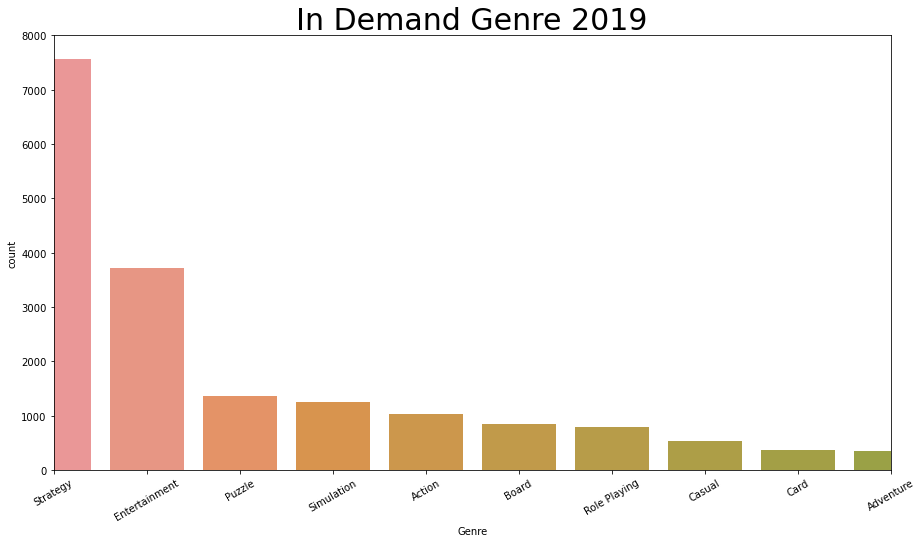

In [148]:
# Ploting In-Demand Genre's for better visualization.
plt.figure(figsize=(15, 8)) 
sns.countplot((df_genre_entries['Genre']),order=df_genre_entries['Genre'].value_counts(ascending=False).index)
# Rotate xlabel for better reading
plt.xticks(rotation=30)
# Using Zoom and exclude games in genre
plt.axis([1,10, 0,8000])
plt.title('In Demand Genre 2019', fontsize = 30)

### Strategy and Entertainment Games
Strategy and Entertainment games are conquering the mobile gaming market. Let's check out all the games.  

In [164]:
devdf = games[['Name','Genres']]
devdf.loc[devdf['Genres'].str.contains('Strategy'), 'strategy'] = True
devdf.loc[devdf['Genres'].str.contains('Entertainment'), 'entertainment'] = True

devdf = devdf.melt(id_vars=['Name'], 
    value_vars=['strategy','entertainment'],
    var_name='Games Category',
    value_name='GameFlags')

devdf

C:\Users\Toto\anaconda3\lib\site-packages\pandas\core\indexing.py:1596: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
C:\Users\Toto\anaconda3\lib\site-packages\pandas\core\indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


,Name,Games Category,GameFlags
0,Sudoku,strategy,True
1,Reversi,strategy,True
2,Morocco,strategy,True
3,Sudoku (Free),strategy,True
4,Senet Deluxe,strategy,True
...,...,...,...
15117,Die Last,entertainment,True
15118,Basic Slosh,entertainment,True
15119,Idle Racing Tycoon,entertainment,NaN
15120,Glow Hockey Strike,entertainment,NaN


# Work in Progress...